In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from os import system

Matplotlib created a temporary config/cache directory at /var/folders/fm/gf09nxpx12n_7pcjsnlx5yt00000gn/T/matplotlib-ahrukz_7 because the default path (/Users/Yousefmacer/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Fontconfig warning: ignoring UTF-8: not a valid region tag


In [9]:
df = pd.read_json('chainlink/link_partnerships.json')
df.head(10)

,name,status,chains,category,integrations,year
0,stablr,live,[ethereum],cefi,[proof of reserve],2022
1,huobi,live,[ethereum],node operator,"[node, proof of reserve]",2020
2,tollan worlds,live,[polygon],gaming,[vrf],2022
3,autobet,live,[polygon],gaming,"[automation, vrf]",2022
4,sonne finance,live,[optimism],marketing,[data feeds],2022
5,mrhb,live,[ethereum],dex,[data feeds],2022
6,realtize,live,"[bnb chain, ethereum]",protocol,[any api],2022
7,gobetty,live,[bnb chain],nft,[vrf],2022
8,aidi finance,live,[polygon],nft,[data feeds],2022
9,landvault,live,[],metaverse,[data feeds],2022


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          1610 non-null   object
 1   status        1610 non-null   object
 2   chains        1610 non-null   object
 3   category      1599 non-null   object
 4   integrations  1610 non-null   object
 5   year          1610 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 75.6+ KB


In [10]:
df['num_integrations'] = df['integrations'].apply(lambda x: len(x))
df['num_chains'] = df['chains'].apply(lambda x: len(x))
new_df = df[['name','category','num_chains', 'num_integrations', 'year']].copy()

In [11]:
new_df

,name,category,num_chains,num_integrations,year
0,stablr,cefi,1,1,2022
1,huobi,node operator,1,2,2020
2,tollan worlds,gaming,1,1,2022
3,autobet,gaming,1,2,2022
4,sonne finance,marketing,1,1,2022
...,...,...,...,...,...
1605,openlaw,consortium,1,1,2018
1606,clintex,blockchain,1,1,2018
1607,ic3,consortium,1,0,2018
1608,zeppelinos,developer tool,1,1,2017


In [18]:
'''
# Create the plot
plt.bar(df['year'], df['category'])
df['year'] = df['year'].astype(str)
df['category'] = df['category'].astype(str)
df = df.fillna("null")


# Show the plot
plt.show()
'''

'\n# Create the plot\nplt.bar(df[\'year\'], df[\'category\'])\ndf[\'year\'] = df[\'year\'].astype(str)\ndf[\'category\'] = df[\'category\'].astype(str)\ndf = df.fillna("null")\n\n\n# Show the plot\nplt.show()\n'

In [72]:
unique_values = df['category'].unique()
data = {}
count=0
for c in df["category"]:
    if c is None:
        pass
    elif c not in data:
        data[c] = 1
    else:
        data[c]+=1


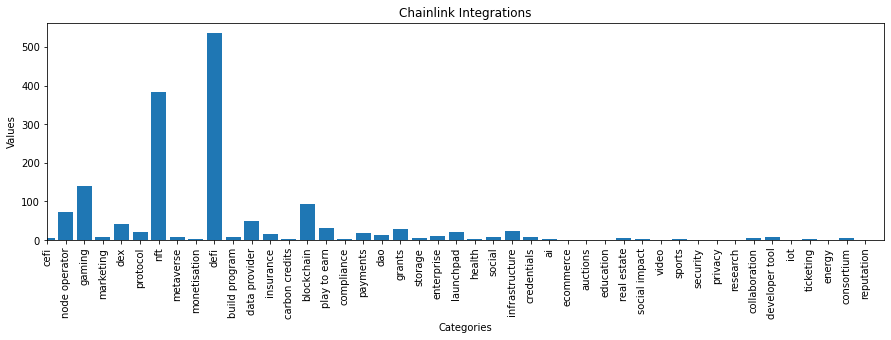

In [75]:
# Create the figure and axes objects
fig, ax = plt.subplots()

# Extract the categories and values
categories = list(data.keys())
values = list(data.values())

# Create the plot
plt.bar(categories, values)

# Set the x-axis limits
ax.set_xlim(0, len(data))

# Add a title and labels for the x and y axes
plt.title('Chainlink Integrations')
plt.xlabel('Categories')
plt.ylabel('Values')

fig.set_figwidth(15) 

# Rotate the x axis labels
ax.xaxis.set_tick_params(rotation=90)


